## Global Max SPEA with job bundling
- This is a variant of the SPEA algorithm in which the jobs are bundled together into 1 big circuit and sent to the backend.
- NOTE : the **alternate approach** is being used in this particular code 
- Note, the total API calls are bound by just **MAX_ITERS** as the job manager sends the circuits in a bundle and executes according to the backend limit on which we are executing
- This is much better than the **$O(2^{n})$** calls done otherwise with the normal approach 

#### Trying out Job manager 
- This manager is used to **optimize** the api call time that is needed in the backend execution

### Imports

In [1]:
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education')

In [2]:
from qiskit import QuantumCircuit, execute, transpile, Aer
from qiskit.extensions import UnitaryGate, Initialize
from qiskit.quantum_info import Statevector
from qiskit.compiler import assemble 
from qiskit.tools.visualization import plot_bloch_vector
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from time import sleep
import sys
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
%matplotlib inline

- So what job manager does is that it takes all circuits, executes them in batches of 75 and brings back the results.
- This means, what I can do is I need (2Bm) jobs each consisting of resolution number of circuits.
- This means, I can bundle all the (2Bm.resolution) jobs together , get the result 
- Now, take first resolution number of jobs, get the max theta and cost and append to the list 
- At the end you will only have **max_iters** jobs that are sent to the backend instead of **max_iters.2*Bm** jobs, exponentially lesser api calls

### Algorithm

In [3]:
from bundled_global_max_alt_SPEA import bundled_SPEA_alternate 

### Testing
- This algorithm is tested for a phase gate of $ \theta = \frac{1}{4} $ 

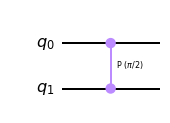

In [4]:
q = QuantumCircuit(2)
q.cp(2*np.pi*(1/4), 0, 1)
q.draw('mpl')

In [5]:
spe = bundled_SPEA_alternate(q, resolution=30, error=3, max_iters=10)

- Choosing backend as **ibmq_jakarta**

In [6]:
jakarta = provider.get_backend('ibmq_jakarta')
bogota = provider.get_backend('ibmq_bogota')

In [ ]:
thetas = []
for k in range(5):
    result = spe.get_eigen_pair(
        backend=jakarta, progress=True, randomize=True)
    print("Result is :", result)
    thetas.append(result['theta'])

In [ ]:
thetas

In [ ]:
plt.title("Plot for returned Eigenvalues", fontsize=16)
plt.xlabel("Experiment number")
plt.ylabel("Eigenvalues")
plt.plot([0, 6], [0, 0], color='black')
plt.plot([0, 6], [1, 1], color='black')
plt.plot([0, 6], [0.25, 0.25], color='black')
plt.plot(list(range(5)), thetas, label='Estimates',
         color='cyan', linewidth=2, marker='s')
plt.legend()
plt.grid()